In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Telecom_Clean.xlsx',index_col=0)

In [3]:
cols=[]
for i in df.columns:
    if ((df.loc[:,i].dtype=='object') or (i in (['NB_Emp','Orange','Ooredoo','Questyear','Questmonth','QuestDay','Size_CompMin',
'Size_CompMax','TunisieTélécom','Note']))):
        cols.append(i)
df_note=df.loc[:, df.columns.difference(cols)]

df['Note']=df_note.loc[:,df_note.columns.difference(['Note'])][(df_note!=999)&(df_note!=11)].mean(axis=1)
df['Satisfied']=df.apply(lambda row:  0 if (row['Note']< 5) else ( 1 if 5 <= row['Note'] < 7 else 2),axis=1 )


In [9]:
df[df['Satisfied']==1]['Opert_Princ'].value_counts().plot.pie()
plt.legend(bbox_to_anchor=(1, 1),title='Satisfaction Range')

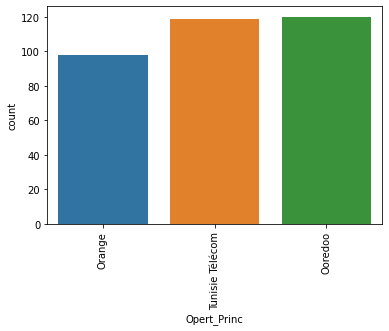

In [453]:
sns.countplot(df[df['Satisfied']==0]['Opert_Princ'])
plt.xticks(rotation=90)
plt.show()

In [367]:
1370/1439

0.9520500347463516

In [494]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title('Orange')
plt.pie(df[df['Opert_Princ']=='Orange']['Satisfied'].value_counts(),autopct='%1.2f',shadow=True,explode=[0.1,0.1,0.1],textprops=dict(color="w",weight='bold',size=16))
plt.legend({
    '7-10':'2','0-5':'0','5-7':'1',
},bbox_to_anchor=(1, 1),title='Satisfaction Range')
plt.subplot(1,3,2)
plt.title('Ooredoo')
plt.pie(df[df['Opert_Princ']=='Ooredoo']['Satisfied'].value_counts(),autopct='%1.2f',shadow=True,explode=[0.1,0.1,0.1],textprops=dict(color="w",weight='bold',size=16))
plt.legend({
    '7-10':'2','0-5':'0','5-7':'1',
},bbox_to_anchor=(1, 1),title='Satisfaction Range')
plt.subplot(1,3,3)
plt.title('Telecom')
plt.pie(df[df['Opert_Princ']=='Tunisie Télécom']['Satisfied'].value_counts(),autopct='%1.2f',shadow=True,explode=[0.1,0.1,0.1],textprops=dict(color="w",weight='bold',size=16))
plt.legend({
    '7-10':'2','0-5':'0','5-7':'1',
},bbox_to_anchor=(1, 1),title='Satisfaction Range')
plt.show()

In [345]:
df['Opert_Princ'].value_counts()

Ooredoo            519
Orange             484
Tunisie Télécom    436
Name: Opert_Princ, dtype: int64

In [353]:
df[(df['Satisfied']==2)&(df['Opert_Princ']=="Ooredoo")].shape[0]/519+()

1.0